In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [2]:
file = 'C:/Users/Vivekanand/Downloads/SampleSuperstore.csv'

In [3]:
df = pd.read_csv(file)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [5]:
df.describe(include = 'all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [6]:
df.info

<bound method DataFrame.info of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code R

In [7]:
df['Discount'].replace(0.00, np.nan, inplace = True)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,NaN,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,NaN,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,NaN,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
missing_data = df.isnull()
missing_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
missing_data['Discount'].value_counts()

False    5196
True     4798
Name: Discount, dtype: int64

In [10]:
df['Discount'].replace(np.nan, df['Discount'].min(axis = 0), inplace = True)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.10,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.10,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.10,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [12]:
df.drop(columns = 'Country', axis = 0, inplace = True)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.10,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.10,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.10,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
Profit_Percent = (df['Profit']/(df['Sales']-df['Profit']))*100
Profit_Percent.describe()

count    9994.000000
mean       32.378384
std        41.214409
min       -73.333333
25%         8.108108
50%        36.986301
75%        56.862745
max       100.000000
dtype: float64

In [14]:
df = pd.concat([df, Profit_Percent], axis = 1)
df.rename(columns = {0 : 'Profit_Percent'}, inplace = True)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_Percent
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.10,41.9136,19.047619
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.10,219.5820,42.857143
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.10,6.8714,88.679245
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-28.571429
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,12.676056


Text(0.5, 0, 'Quantity')

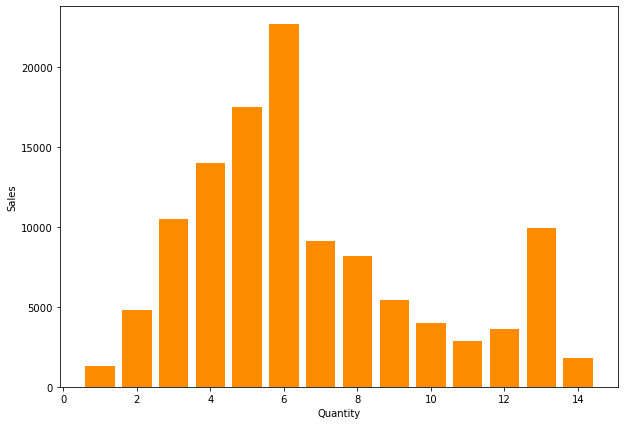

In [16]:
width = 10
height = 7
plt.figure(figsize=(width, height))
plt.bar(df['Quantity'],df['Sales'], color = 'darkorange')
plt.ylabel('Sales')
plt.xlabel('Quantity')

Text(0.5, 0, 'Ship Mode')

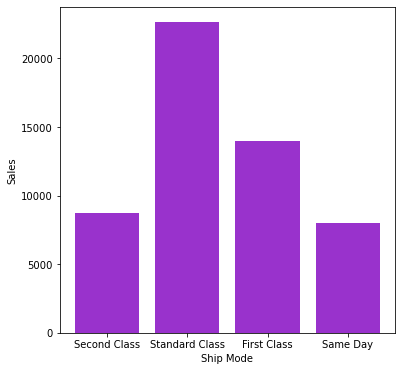

In [17]:
width = 6
height = 6
plt.figure(figsize=(width, height))
plt.bar(df['Ship Mode'],df['Sales'], color = 'darkorchid')
plt.ylabel('Sales')
plt.xlabel('Ship Mode')

Text(0.5, 0, 'Region')

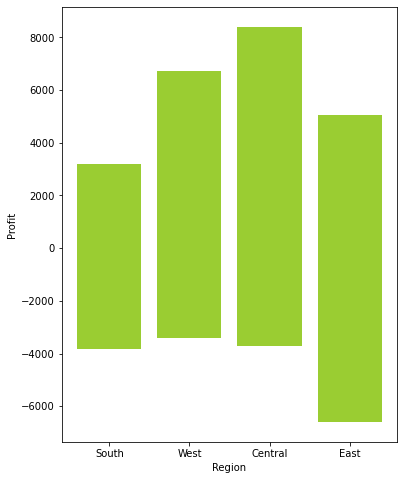

In [29]:
width = 6
height = 8
plt.figure(figsize=(width, height))
plt.bar(df['Region'],df['Profit'], color = 'yellowgreen')
plt.ylabel('Profit')
plt.xlabel('Region')

In [44]:
df.corr(method = 'pearson')
#pearson/kendall

,Postal Code,Sales,Quantity,Discount,Profit,Profit_Percent
Postal Code,1.000000,-0.023854,0.012761,0.040732,-0.029961,-0.056863
Sales,-0.023854,1.000000,0.200795,-0.034918,0.479064,-0.060972
Quantity,0.012761,0.200795,1.000000,0.012451,0.066253,0.001901
Discount,0.040732,-0.034918,0.012451,1.000000,-0.215936,-0.751113
Profit,-0.029961,0.479064,0.066253,-0.215936,1.000000,0.215752
Profit_Percent,-0.056863,-0.060972,0.001901,-0.751113,0.215752,1.000000


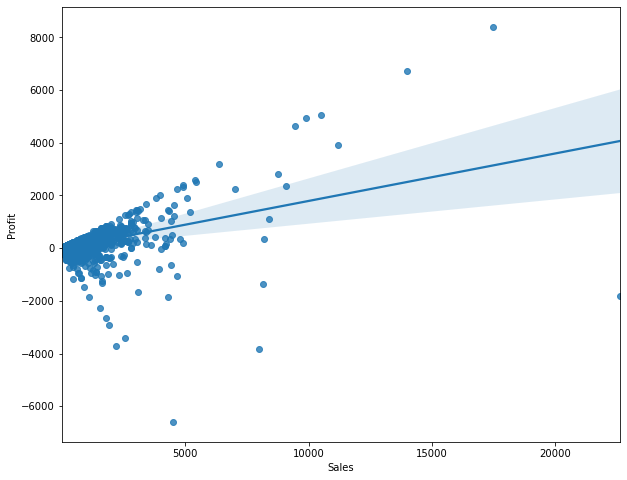

In [45]:
width = 10
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x='Sales', y='Profit', data=df)

(-100.0, 150.0)

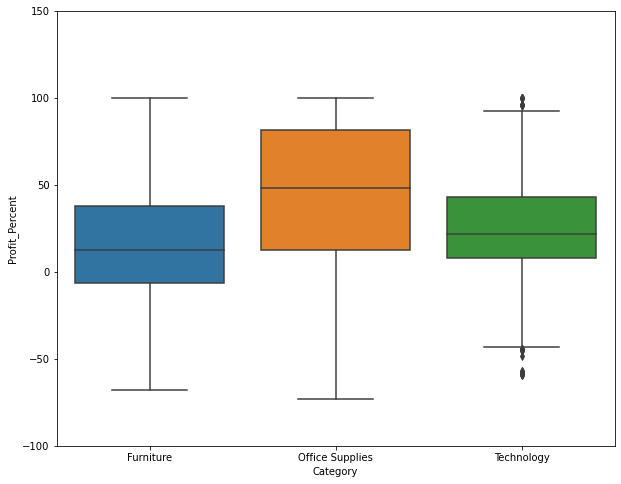

In [20]:
width = 10
height = 8
plt.figure(figsize=(width, height))
sns.boxplot(x = 'Category', y = 'Profit_Percent', data = df)
plt.ylim(-100,150)

In [21]:
df_group_one = df[['Region','Category','Profit']]
df_group_one = df_group_one.groupby(['Region','Category'],as_index=False).mean()          # Here Agg is mean
df_group_one

,Region,Category,Profit
0,Central,Furniture,-5.968918
1,Central,Office Supplies,6.244712
2,Central,Technology,80.231981
3,East,Furniture,5.068496
4,East,Office Supplies,23.957114
5,East,Technology,88.714084
6,South,Furniture,20.395199
7,South,Office Supplies,20.086827
8,South,Technology,68.231506
9,West,Furniture,16.272914


In [43]:
pearson_coef, p_value = stats.pearsonr(df['Sales'], df['Profit'])
print(pearson_coef, p_value)

0.47906434973770656 0.0


In [23]:
lm = LinearRegression()
X = df[['Sales', 'Discount']]
Y = df['Profit']
lm.fit(X,Y)

LinearRegression()

In [24]:
Z=lm.predict(X)
Z[0:5]  

array([ 62.40967461, 145.80712388,  18.51945566,  91.61762666,
        -7.02813593])

In [25]:
print(lm.intercept_, lm.coef_)

42.84761818331221 [ 1.77448932e-01 -2.69224659e+02]


c:\users\vivekanand\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\vivekanand\appdata\local\programs\python\python36\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


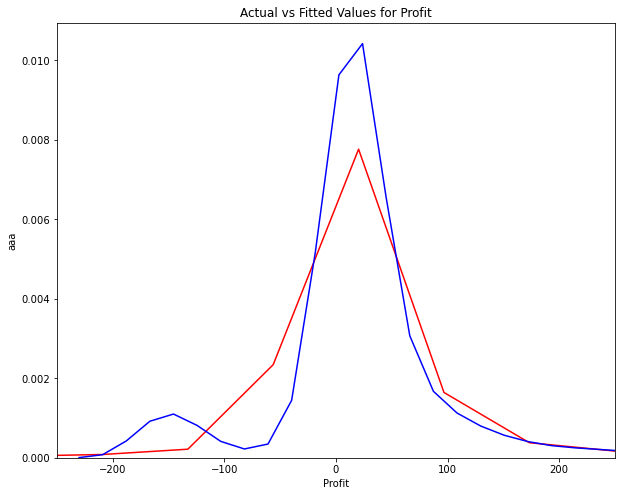

In [26]:
width = 10
height = 8
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['Profit'], hist=False, color="r", label="Actual Value")
sns.distplot(Z, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.xlim(-250,250)
plt.title('Actual vs Fitted Values for Profit')
plt.xlabel('Profit')
plt.ylabel('aaa')

plt.show()
plt.close()

In [27]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 15000, 100)
    y_new = model(x_new)
    plt.xlim(0,10000)
    plt.ylim(-4000,4000)
    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [30]:
x1 = df['Sales']
y1 = df['Profit']
f = np.polyfit(x1, y1, 8)
p = np.poly1d(f)
print(p)

           8             7             6             5             4
-5.03e-28 x + 3.558e-23 x - 9.725e-19 x + 1.293e-14 x - 8.616e-11 x
              3             2
 + 2.691e-07 x - 0.0003149 x + 0.1965 x - 1.35


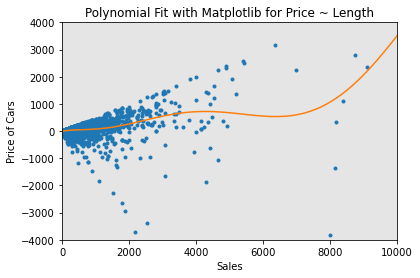

In [31]:
PlotPolly(p, x1, y1, 'Sales')

In [32]:
%%capture
! pip install ipywidgets

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Profit',axis=1), y1, test_size=0.45, random_state=0)

In [34]:
pr = PolynomialFeatures(degree=4)
x_train_pr = pr.fit_transform(x_train[['Sales']])
x_test_pr = pr.fit_transform(x_test[['Sales']])
pr

PolynomialFeatures(degree=4)

In [36]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [37]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 2.00494074,  1.91258922,  3.56174614, 33.66811436,  1.53800643])

In [38]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 2.00494074  1.91258922  3.56174614 33.66811436]
True values: [11.68    9.7438  2.6406 17.745 ]


In [39]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 10
    height = 8
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-4000, 9000])
    plt.ylabel('Price')
    plt.legend()

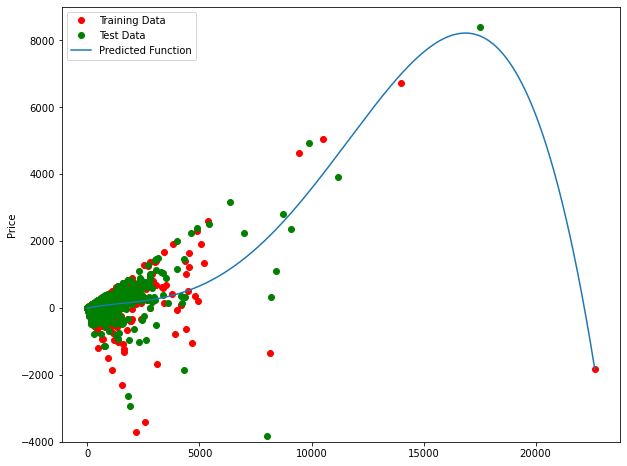

In [40]:
PollyPlot(x_train[['Sales']], x_test[['Sales']], y_train, y_test, poly,pr)

In [41]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64